<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Model" data-toc-modified-id="Learning-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Model</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#Submissions-to-Kaggle" data-toc-modified-id="Submissions-to-Kaggle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Submissions to Kaggle</a></span><ul class="toc-item"><li><span><a href="#Submission-2---More-features-and-Regular-Ordinary-Least-Squares" data-toc-modified-id="Submission-2---More-features-and-Regular-Ordinary-Least-Squares-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Submission 2 - More features and Regular Ordinary Least Squares</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></li></ul></div>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib notebook
sns.set()
pd.set_option('display.max_columns',500)

In [96]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [22]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [23]:
df_train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
# Clean missing data
df_train.drop('PoolQC',axis=1,inplace=True)
df_train.drop('MiscFeature',axis=1,inplace=True)
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')

In [10]:
# Show missing values
missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = missing / len(df_train)
df_missing = pd.concat([missing,percent_missing],axis=1)
df_missing.columns=['num_missing','percent_missing']
df_missing

,num_missing,percent_missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [18]:
def get_categorical_or_continuous_features(df):
    categorical_features = []
    continuous_features = []
    for col in df.columns:
        if df[col].dtype=='O':
            categorical_features.append(col)
        else:
            continuous_features.append(col)
    return(categorical_features,continuous_features)

In [19]:
categorical_features, continuous_features = get_categorical_or_continuous_features(df_train)

In [121]:
def plot_correlation_matrix_heat_map(df,label,num_fields):
    df2 = pd.concat([df[label],df_train.drop(label,axis=1)],axis=1)
    correlation_matrix = df2.corr()
    index = correlation_matrix.sort_values(label,ascending=False).index
    correlation_matrix = correlation_matrix[index].sort_values(label,ascending=False)
    sns.set(font_scale=1.25)
    fig,ax = plt.subplots(figsize=(12,9))
    sns.heatmap(correlation_matrix.iloc[:num_fields,:num_fields],annot=True,fmt='.2f')
    return(fig,ax)

<IPython.core.display.Javascript object>


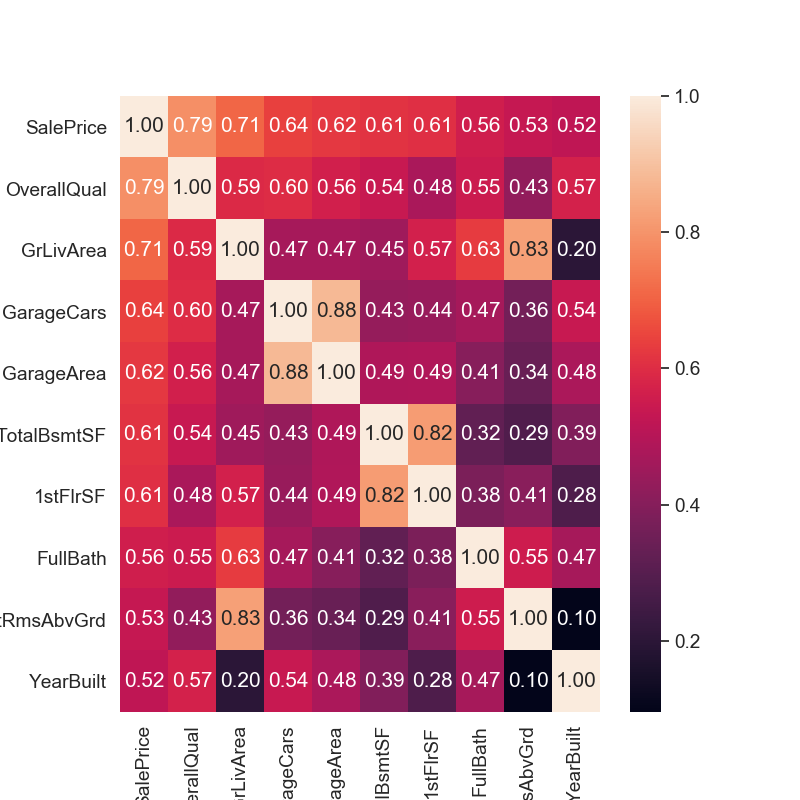

In [150]:
fig,ax = plot_correlation_matrix_heat_map(df_train,'SalePrice',10)
fig.set_size_inches(8,8)
plt.gcf().subplots_adjust(left=.15)

In [90]:
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return (np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))))

In [143]:
def get_categorical_correlations(df,label):
    correlation_series = []
    for col in df.columns:
        correlation_series.append(cramers_v(df[col],df[label]))
    return(pd.DataFrame(data=correlation_series,index=df.columns).sort_values(0,ascending=False))

In [145]:
df_train_categorical = pd.concat([df_train.select_dtypes(['O','category']),df_train['SalePrice']],axis=1)
get_categorical_correlations(df_train_categorical,'SalePrice')

,0
SalePrice,1.000000
ExterQual,0.444187
KitchenQual,0.434299
Street,0.393452
BsmtQual,0.391594
Heating,0.349594
BsmtCond,0.345298
GarageFinish,0.343870
CentralAir,0.335682
LotShape,0.324009


In [220]:
df_train_categorical.drop('SalePrice',axis=1).describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,281,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,157,1267,1198


# Learning Model

In [262]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
import math
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score()

In [272]:
# vectorized error calc
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

## Feature Selection

In [288]:
feature_list = ['OverallQual','GrLivArea','GarageCars','ExterQual','KitchenQual','Heating','BsmtCond','CentralAir']

# features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd']
features = []
for feature in feature_list:
    features.append(feature)
    label = 'SalePrice'

    X_train, X_test, y_train, y_test = train_test_split(df_train[features],df_train[label],random_state=0)
    
    X_train_dummies = pd.get_dummies(X_train)
    X_test_dummies = pd.get_dummies(X_test)

    diff1_cols = X_train_dummies.columns.difference(X_test_dummies.columns)
    diff2_cols = X_test_dummies.columns.difference(X_train_dummies.columns)
    for col in diff1_cols:
        X_test_dummies[col]=0
    for col in diff2_cols:
        X_train_dummies[col]=0
    
    regr = Pipeline([
        ('scaler',StandardScaler()),
        ('regr',Lasso(random_state=0,max_iter=100000))
    ])

    parameters = {
        'regr__alpha':[.1,1,10]
    }

    gs_regr = GridSearchCV(regr,parameters,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
    a = gs_regr.fit(X_train_dummies.astype(float),y_train)
    
    predictions = gs_regr.predict(X_test_dummies.astype(float))
    print('Added Feature: ', feature)
    print('Params: ',gs_regr.best_params_)
    print('Root Mean Square Log Error: ', rmsle(y_test,predictions))
    
#     print('Root Mean Square: ',r2_score(y_test,predictions))
#     print('Root Mean Square of the Log: ',r2_score(y_test.apply(math.log),list(map(math.log,predictions))))

Added Feature:  OverallQual
Params:  {'regr__alpha': 0.1}
Root Mean Square Log Error:  0.2462597491348495
Added Feature:  GrLivArea
Params:  {'regr__alpha': 1}
Root Mean Square Log Error:  0.2267144992226015
Added Feature:  GarageCars
Params:  {'regr__alpha': 0.1}
Root Mean Square Log Error:  0.22733959824748895
Added Feature:  ExterQual
Params:  {'regr__alpha': 10}
Root Mean Square Log Error:  0.20142397678621213
Added Feature:  KitchenQual
Params:  {'regr__alpha': 1}
Root Mean Square Log Error:  0.19350390192527375
Added Feature:  Heating
Params:  {'regr__alpha': 0.1}
Root Mean Square Log Error:  0.20884210959892988
Added Feature:  BsmtCond
Params:  {'regr__alpha': 10}
Root Mean Square Log Error:  0.20492885202281388
Added Feature:  CentralAir
Params:  {'regr__alpha': 10}
Root Mean Square Log Error:  0.3094374202399538


# Submissions to Kaggle

## Submission 2 - More features and Regular Ordinary Least Squares

In [282]:
features = ['OverallQual','GrLivArea','GarageCars','ExterQual','KitchenQual']
label = 'SalePrice'

# X_train, X_test, y_train, y_test = train_test_split(df_train[features],df_train[label],random_state=0)
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[label]

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)
X_test_dummies = X_test_dummies.fillna(X_test_dummies.mean())

diff1_cols = X_train_dummies.columns.difference(X_test_dummies.columns)
diff2_cols = X_test_dummies.columns.difference(X_train_dummies.columns)
for col in diff1_cols:
    X_test_dummies[col]=0
for col in diff2_cols:
    X_train_dummies[col]=0

regr = Pipeline([
    ('scaler',StandardScaler()),
    ('regr',Lasso(random_state=0,max_iter=100000))
])

parameters = {
    'regr__alpha':[.1,1,10]
}

gs_regr = GridSearchCV(regr,parameters,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
a = gs_regr.fit(X_train_dummies.astype(float),y_train)

predictions = gs_regr.predict(X_test_dummies.astype(float))

df_predictions = pd.DataFrame(index=df_test['Id'],columns=['SalePrice'],data=predictions)
df_predictions.to_csv('Submission_02.csv')

In [286]:
df = pd.read_csv('Submission_02.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [287]:
df_coef = pd.DataFrame(index=X_train_dummies.columns,data=gs_regr.best_estimator_.named_steps['regr'].coef_)
df_coef.sort_values(0)

,0
KitchenQual_TA,-680.010848
ExterQual_Fa,-494.640330
KitchenQual_Fa,-448.587917
ExterQual_TA,-370.918983
KitchenQual_Gd,4421.802994
ExterQual_Gd,5665.326120
ExterQual_Ex,9922.235234
KitchenQual_Ex,12637.782225
GarageCars,13868.708627
OverallQual,24445.734108


## Linear Regression